In [2]:
import numpy as np
import matplotlib.pyplot as plt

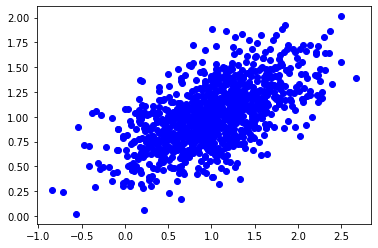

In [11]:

num = 1000
mu1 = np.array([1, 1])
cov1 = np.mat("0.3 .1;0.1 0.1")
sample = np.zeros((num, 2))
sample[:num, :] = np.random.multivariate_normal(mean=mu1, cov=cov1, size=num)
plt.plot(sample[:num, 0], sample[:num, 1], "bo")
plt.show()

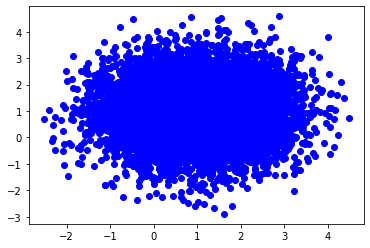

In [14]:
#当 cov(X, Y)=0时，表明 X与Y 不相关；
num = 10000
mu1 = np.array([1, 1])
cov1 = np.mat("1 0;0 1")
sample = np.zeros((num, 2))
sample[:num, :] = np.random.multivariate_normal(mean=mu1, cov=cov1, size=num)
plt.plot(sample[:num, 0], sample[:num, 1], "bo")
plt.show()


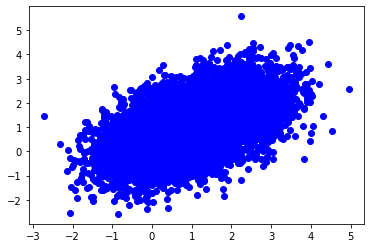

In [3]:
# 当 cov(X, Y)>0时，表明 X与Y 正相关；
num = 10000
mu1 = np.array([1, 1])
cov1 = np.mat("1 0.5;0.5 1")
sample = np.zeros((num, 2))
sample[:num, :] = np.random.multivariate_normal(mean=mu1, cov=cov1, size=num)
plt.plot(sample[:num, 0], sample[:num, 1], "bo")
plt.show()

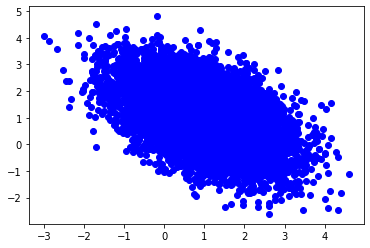

In [4]:
#当 cov(X, Y)<0时，表明X与Y负相关；
num = 10000
mu1 = np.array([1, 1])
cov1 = np.mat("1 -0.5;-0.5 1")
sample = np.zeros((num, 2))
sample[:num, :] = np.random.multivariate_normal(mean=mu1, cov=cov1, size=num)
plt.plot(sample[:num, 0], sample[:num, 1], "bo")
plt.show()


多维高斯分布的概率密度函数定义
$$p(x)=p(x_1, x_2,\cdots, x_D) = \frac{1}{(2\pi)^{D/2}|\Sigma|^{1/2}}exp\left(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\right)$$

In [40]:
import scipy.stats as st
mean = [1,1]
cov = [[1,0],[0,1]]
pdf = st.multivariate_normal.pdf([0,1])
print(pdf)
cdf = st.multivariate_normal.cdf(np.linspace(-2,2,10))
print(cdf)

[0.39894228 0.24197072]
[0.02275013 0.05990691 0.13326026 0.25249254 0.41207045 0.58792955
 0.74750746 0.86673974 0.94009309 0.97724987]


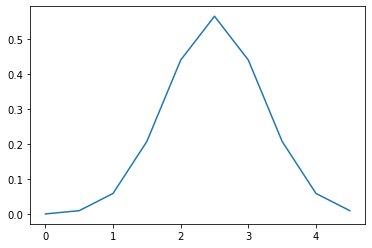

In [31]:
x = np.linspace(0, 5, 10, endpoint=False)       # 样本
y = st.multivariate_normal.pdf(x, mean=2.5, cov=.5)        # 样本的概率密度函数
plt.plot(x, y)
plt.show()

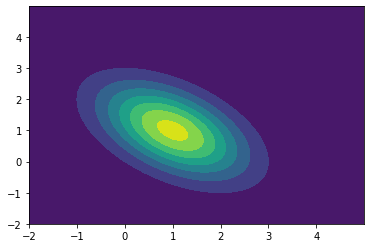

In [47]:
import numpy as np
import scipy.stats as st
import matplotlib.pylab as plt

x, y = np.mgrid[-2:5:.01, -2:5:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = st.multivariate_normal([1, 1], [[1, -0.5], [-0.5, 1]])   # 生成多元正态分布
print(rv)       # <scipy.stats._multivariate.multivariate_normal_frozen object at 0x08EDDDB0> 只是生成了一个对象，并没有生成数组

levels = [-0.4, -0.3, -0.2, -0.1, 0.1, 0.2, 0.3, 0.4] 
# plt.contourf(x, y, z, levels=levels, extend='both', colors=('#ff0000', '#ff9900', '#999900', 'w', '#009999', '#0099ff', '#0000ff')) 
plt.contourf(x, y, rv.pdf(pos))
plt.show()


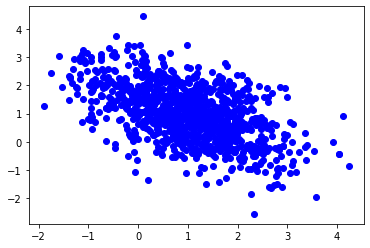

In [50]:
sample = rv.rvs(size=1000)
plt.plot(sample[:num, 0], sample[:num, 1], "bo")
plt.show()

In [25]:
x.shape

(200, 200)

标准正态分布
$$p(x)=\frac{1}{\sqrt{2\pi}}exp(-x^2/2)$$

scipy.stats.norm = <scipy.stats._continuous_distns.norm_gen object>

一个正常的连续随机变量。

位置 (loc) 关键字指定平均值。比例 (scale) 关键字指定标准偏差。

作为 rv_continuous 类的一个实例， norm 对象从它继承了一组泛型方法(完整列表见下文)，并使用特定于该特定分布的详细信息来完善它们。

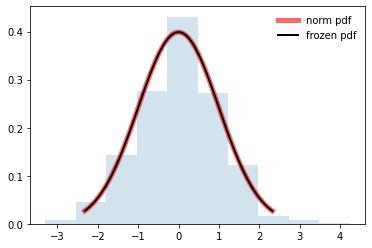

In [14]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = norm.stats(moments='mvsk')
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))
r = norm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [5]:
import scipy.stats as st
x=st.norm.pdf(0,loc=0,scale=1)
y=st.norm.pdf()
print(x)
print(y)
st.multivariate_normal.pdf


3.989422804014327e-01
[0.39894228 0.24197072 0.05399097]


In [6]:
a=st.norm.cdf(0,loc=0,scale=1)
print(a)
x=st.norm.cdf(1.65,loc=0,scale=1)
y=st.norm.cdf(1.96,loc=0,scale=1)
z=st.norm.cdf(2.58,loc=0,scale=1)
print(x,y,z)

0.5
0.9505285319663519 0.9750021048517795 0.9950599842422293


协方差代表了两个变量之间的是否同时偏离均值。

如果正相关，这个计算公式，每个样本对$(x_i, y_i)$,　每个求和项大部分都是正数，即两个同方向偏离各自均值，而不同时偏离的也有，但是少，这样当样本多时，总和结果为正。下面这个图就很直观。